- digits 데이터셋
    * classes : 10개
    * features : 8*8 => 64개

In [37]:
featureDF, targetSR =load_digits(as_frame=True, return_X_y=True)

print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [38]:
targetSR.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
imgdata=featureDF.iloc[0].values.reshape(-1, 8)
imgdata.shape

(8, 8)

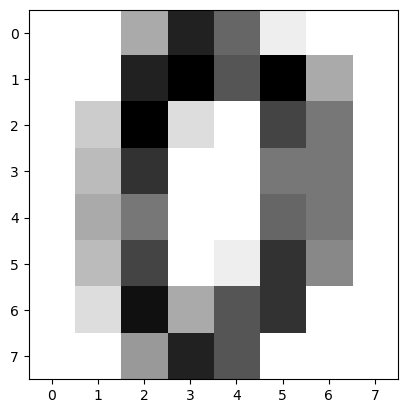

In [40]:
plt.imshow(imgdata, cmap='binary')
plt.show()

In [41]:
X_train, X_test, y_train , y_test =  train_test_split(featureDF, 
                                                      targetSR,
                                                      stratify=targetSR,
                                                      random_state=10)

- OvO(One vs One)
    * 모든 가능한 두 개의 클래스 조합($\frac{n(n-1)}{2}$)에 대해 이진 분류기 생성
    * 가장 많이 양성으로  분류된 클래스 선택

In [42]:
# 모듈로딩
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression


ovo_clf = OneVsOneClassifier(LogisticRegression(max_iter=20000))
ovo_clf.fit(X_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=20000))

In [43]:
# 모델 파라미터
print(f'ovo_clf.estimators_ : {len(ovo_clf.estimators_)}개' )
print(f'ovo_clf.classes_ : {ovo_clf.classes_}' )
print(f'ovo_clf.classes_ : {ovo_clf.n_classes_ }' )

ovo_clf.estimators_ : 45개
ovo_clf.classes_ : [0 1 2 3 4 5 6 7 8 9]
ovo_clf.classes_ : 10


In [44]:
print( ovo_clf.estimators_[0].coef_, ovo_clf.estimators_[0].intercept_)

[[ 0.          0.00073087  0.0076929  -0.09361656 -0.05344559  0.13509444
   0.05514187  0.          0.         -0.0018918  -0.06707916 -0.06032401
   0.04998063 -0.02586978  0.02757973  0.          0.          0.00959182
  -0.02646138  0.11395474  0.19884148 -0.0876873  -0.01607207  0.
   0.         -0.03977354 -0.03673582  0.09069678  0.1946431  -0.03969177
  -0.07974081  0.          0.         -0.10449815 -0.10793336  0.15712639
   0.16086421 -0.04495317 -0.09705905  0.          0.         -0.04425895
  -0.14003921  0.07862081  0.09154166 -0.09119569 -0.08690615  0.
   0.         -0.00558797 -0.07512193 -0.07287355 -0.04672036 -0.09023151
   0.01768561  0.01270775  0.          0.          0.00360121 -0.10112028
  -0.07537405  0.06449402  0.06291835  0.01704451]] [5.42540738]


In [45]:
ovo_clf.decision_function(X_train.iloc[:1])

array([[-0.32502006,  3.67961294,  2.68184246,  9.32842379,  0.67611089,
         8.32748229,  3.68639697,  3.70028923,  7.32111482,  4.72013907]])